# Project2_DecisionTree_RandomForest_LoanDataSet

### A). Project Overview

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

* Target column: not.fully.paid 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

### B). Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read the data and show head of the data

In [6]:
loans = pd.read_csv("Input_Data/loan_data.csv")
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [7]:
#check datatype and null info
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [8]:
#check statistical info
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Exploratory Data Analysis

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


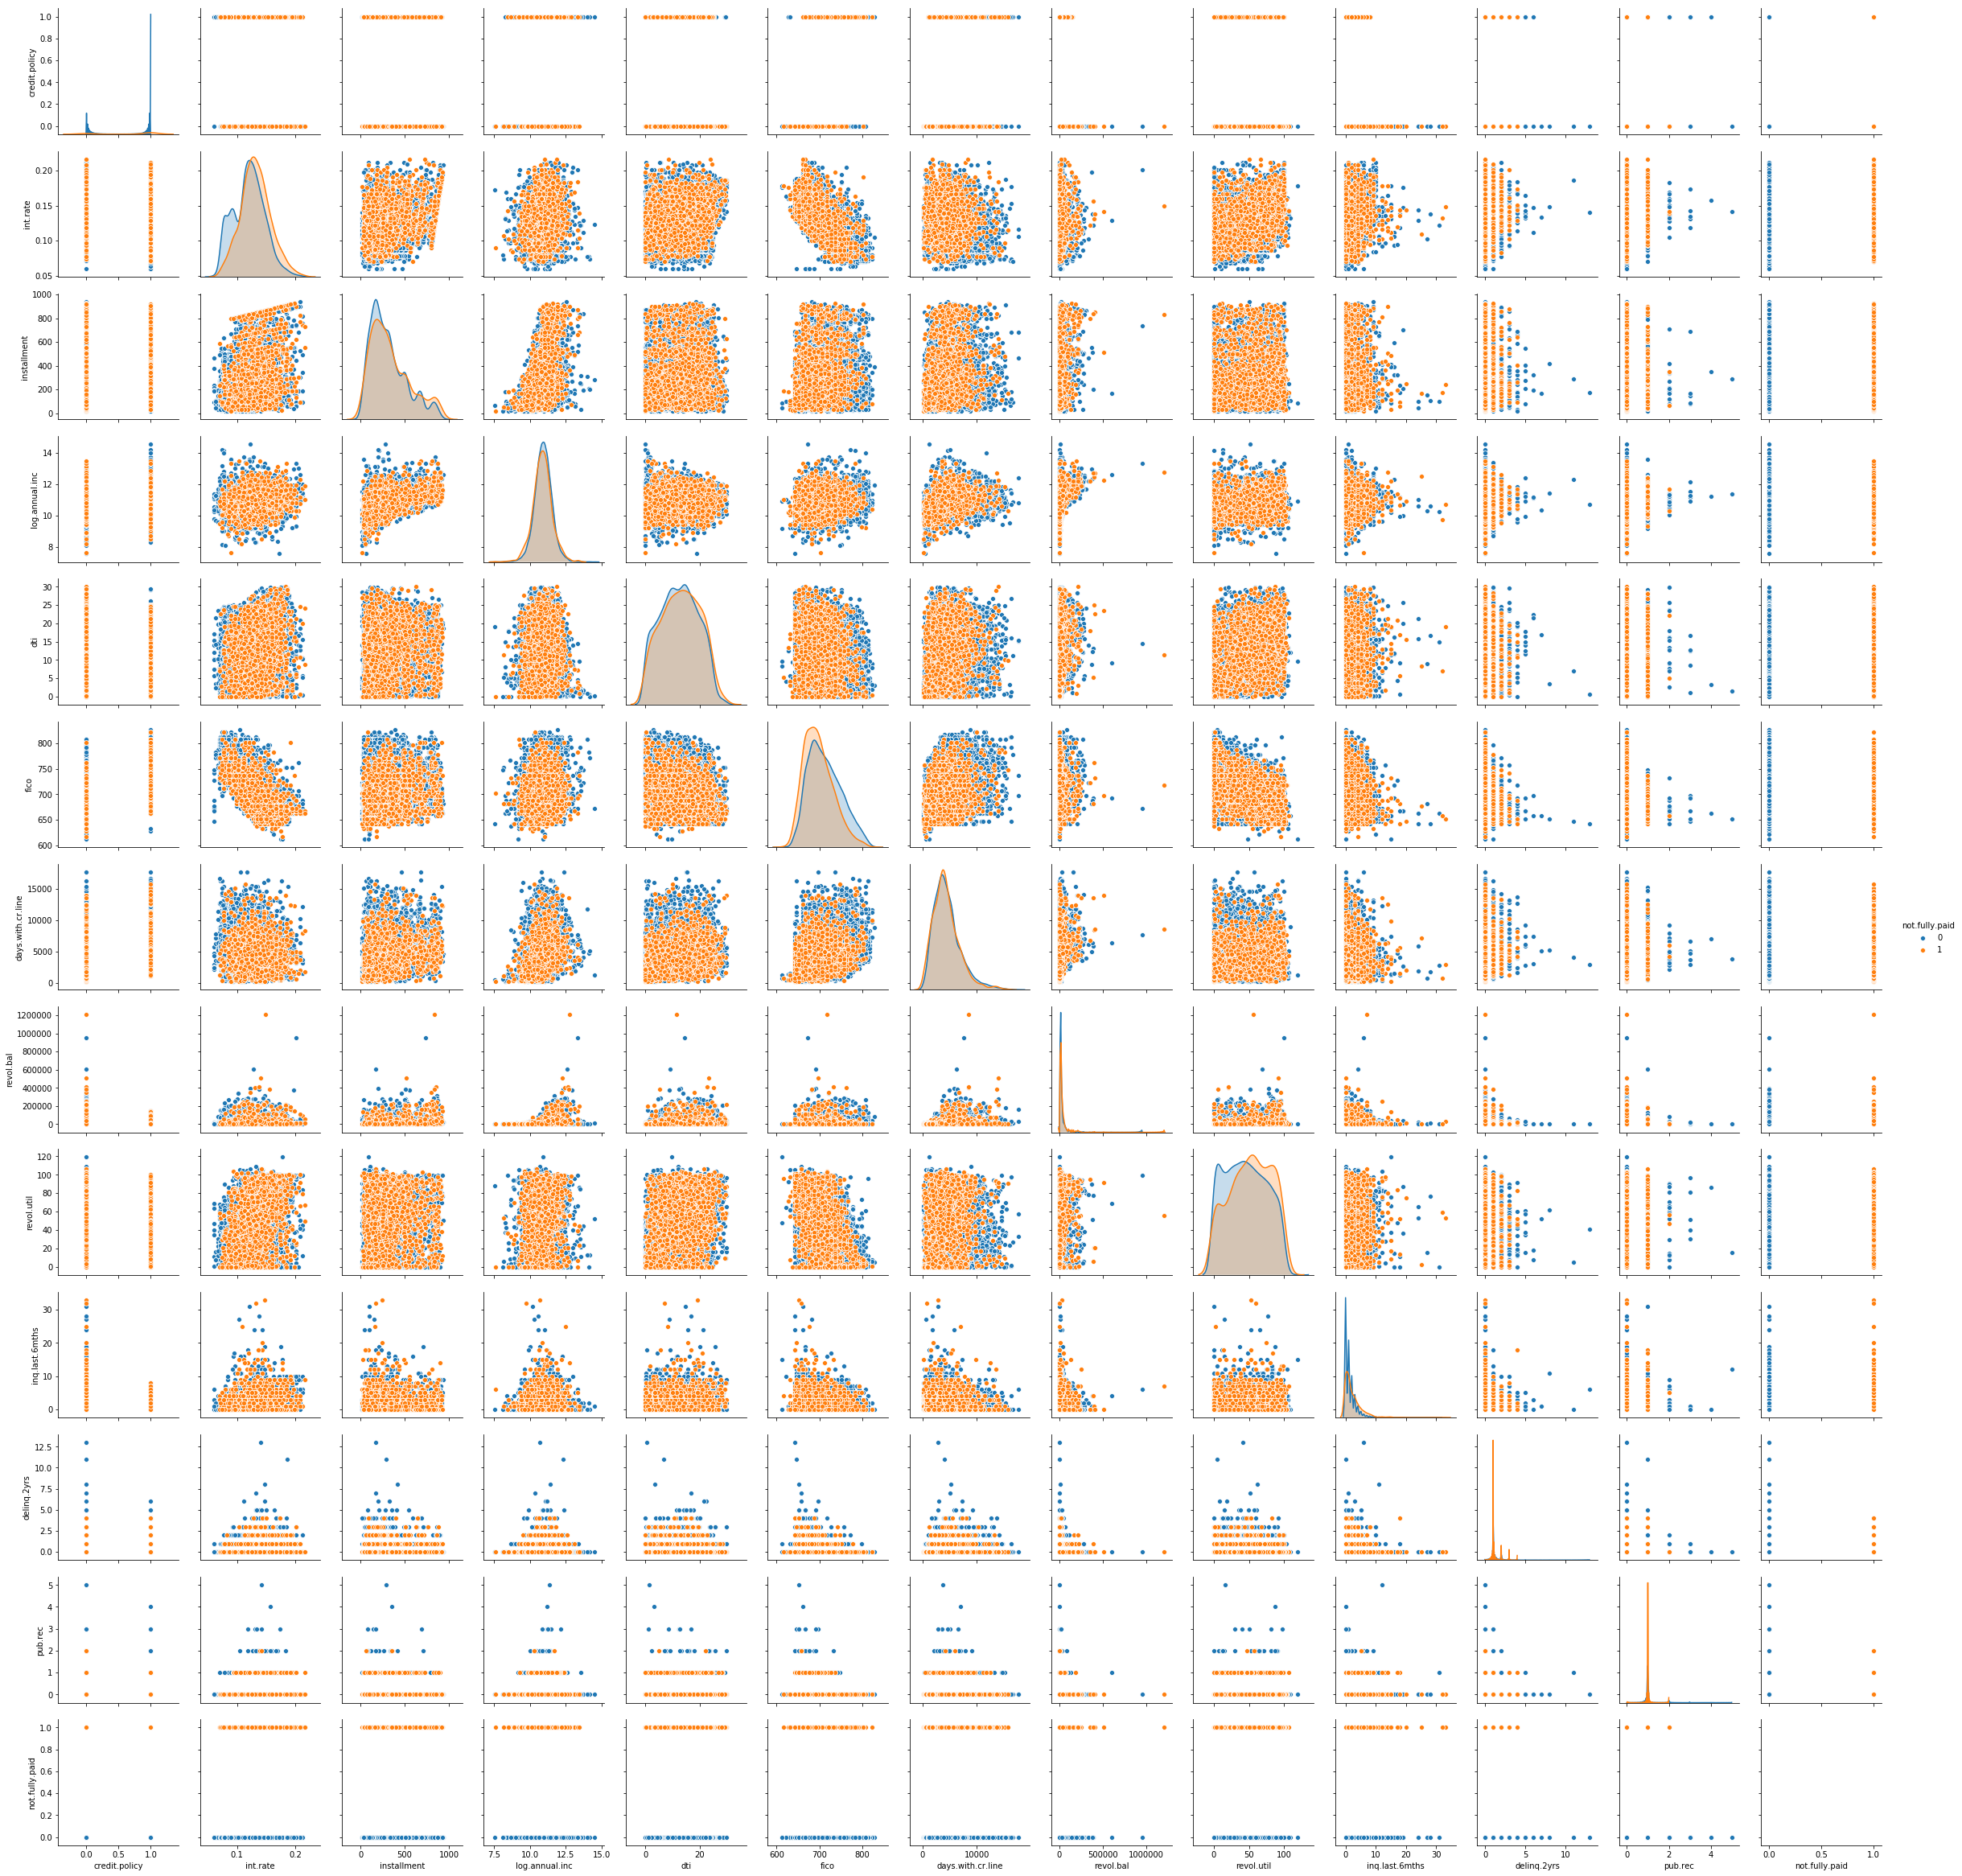

In [9]:
#pairplot for all columns with target column as hue.

sns.pairplot(loans, hue='not.fully.paid')

#### Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.

In [10]:
loans['credit.policy'].value_counts()

# we have 0,1 values in it, lets create a hist plot for FICO column. 

1    7710
0    1868
Name: credit.policy, dtype: int64

Text(0.5, 0, 'FICO')

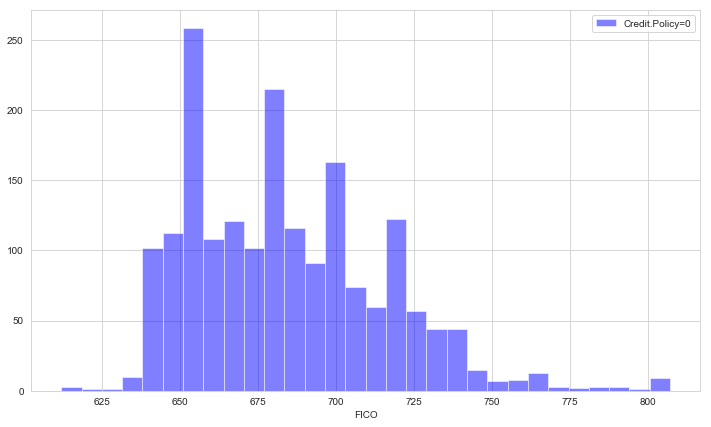

In [32]:
#inner one is for filter purpose, after filter we are selecting only fico column. 
#SQL code: SELECT FICTO FROM LOANS WHERE LOANS.credit.policy = 0
#PANDAS : loans[loans['credit.policy']==0]['fico']

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')


loans[loans['credit.policy']==0]['fico'].hist(bins=30, alpha=0.5, color='blue', label='Credit.Policy=0')
plt.legend()
plt.xlabel("FICO")

Text(0.5, 0, 'FICO')

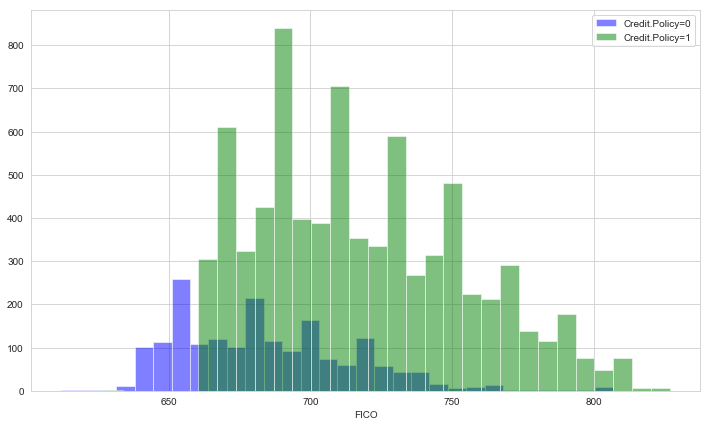

In [33]:
#inner one is for filter purpose, after filter we are selecting only fico column. 
#SQL code: SELECT FICTO FROM LOANS WHERE LOANS.credit.policy = 0 and LOANS.credit.policy = 1
#PANDAS : loans[loans['credit.policy']==0 & 1]['fico']

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')


loans[loans['credit.policy']==0]['fico'].hist(bins=30, alpha=0.5, color='blue', label='Credit.Policy=0')
loans[loans['credit.policy']==1]['fico'].hist(bins=30, alpha=0.5, color='green', label='Credit.Policy=1')
plt.legend()
plt.xlabel("FICO")

#### Create a similar figure, except this time select by the not.fully.paid column.

Text(0.5, 0, 'FICO')

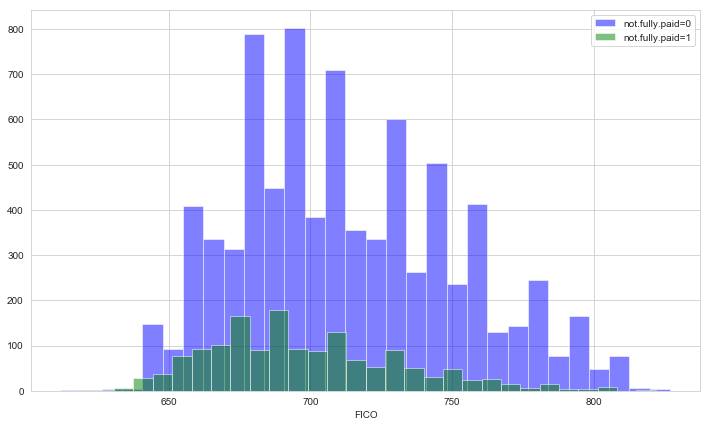

In [34]:
#we can apply the same code above and chage the column name to not.fully.paid

plt.figure(figsize=(12,7))
sns.set_style('whitegrid')


loans[loans['not.fully.paid']==0]['fico'].hist(bins=30, alpha=0.5, color='blue', label='not.fully.paid=0')
loans[loans['not.fully.paid']==1]['fico'].hist(bins=30, alpha=0.5, color='green', label='not.fully.paid=1')
plt.legend()
plt.xlabel("FICO")

#### Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. 

In [35]:
loans['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

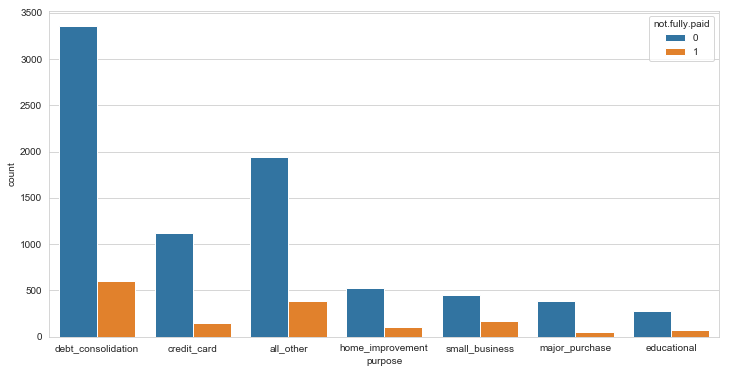

In [39]:
plt.figure(figsize=(12,6))

#sns.countplot(loans['purpose'], hue=loans['not.fully.paid'])
sns.countplot(data=loans, x='purpose', hue)